In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
ingredients = [
    "noodles",
    "boiled noodles",
    "cheese powder",
    "butter",
    "milk",
    "soup",
    "drained boiled noodles",
    "tuna",
    "corn",
    "drained tuna",
    "drained corn"
]

In [4]:
actions = [
    "boil",
    "drain"
]

In [11]:
ii = {}
ai = {}

In [12]:
i = 0
for ing in ingredients:
    ii[ing] = i
    i += 1
i = 0
for act in actions:
    ai[act] = i
    i += 1

In [13]:
ing_act = np.zeros((len(actions), len(ingredients)))
ing_ing = np.zeros((len(ingredients), len(ingredients)))

In [16]:
ing_act[ai["boil"], ii["noodles"]] = 1
ing_act[ai["drain"], ii["boiled noodles"]] = 1
ing_act[ai["drain"], ii["tuna"]] = 1
ing_act[ai["drain"], ii["corn"]] = 1

ing_ing[ii["cheese powder"], ii["butter"]] = 1
ing_ing[ii["cheese powder"], ii["milk"]] = 1
ing_ing[ii["cheese powder"], ii["soup"]] = 1
ing_ing[ii["cheese powder"], ii["drained boiled noodles"]] = 1
ing_ing[ii["cheese powder"], ii["drained tuna"]] = 1
ing_ing[ii["cheese powder"], ii["drained corn"]] = 1


ing_ing[ii["butter"], ii["milk"]] = 1
ing_ing[ii["butter"], ii["soup"]] = 1
ing_ing[ii["butter"], ii["drained boiled noodles"]] = 1
ing_ing[ii["butter"], ii["drained tuna"]] = 1
ing_ing[ii["butter"], ii["drained corn"]] = 1

ing_ing[ii["milk"], ii["soup"]] = 1
ing_ing[ii["milk"], ii["drained boiled noodles"]] = 1
ing_ing[ii["milk"], ii["drained tuna"]] = 1
ing_ing[ii["milk"], ii["drained corn"]] = 1

ing_ing[ii["soup"], ii["drained boiled noodles"]] = 1
ing_ing[ii["soup"], ii["drained tuna"]] = 1
ing_ing[ii["soup"], ii["drained corn"]] = 1

ing_ing[ii["drained boiled noodles"], ii["drained tuna"]] = 1
ing_ing[ii["drained boiled noodles"], ii["drained corn"]] = 1



In [19]:
ing_ing += np.transpose(ing_ing)

In [20]:
ing_ing

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.],
       [0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.],
       [0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.],
       [0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.],
       [0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.]])

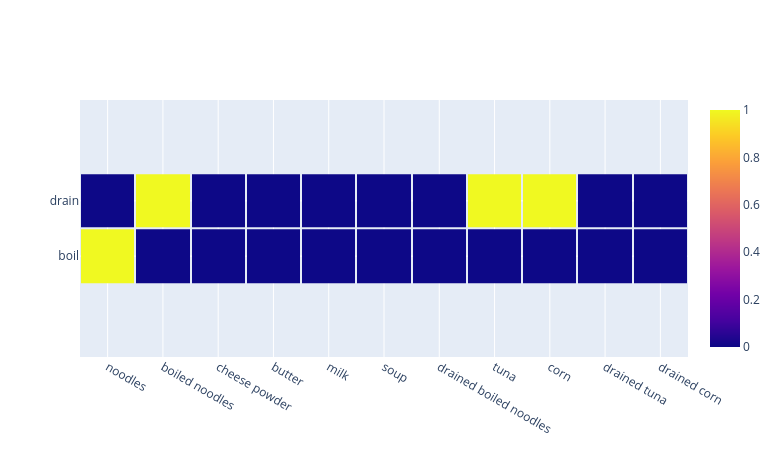

In [35]:
fig = go.Figure(data=go.Heatmap(
                   z=ing_act,
                   x=ingredients,
                   y=actions,
                   xgap = 2,
                   ygap = 2,))

fig.update_layout(
    yaxis = dict(
      scaleanchor = "x",
      scaleratio = 1,
    )
)
fig.show()

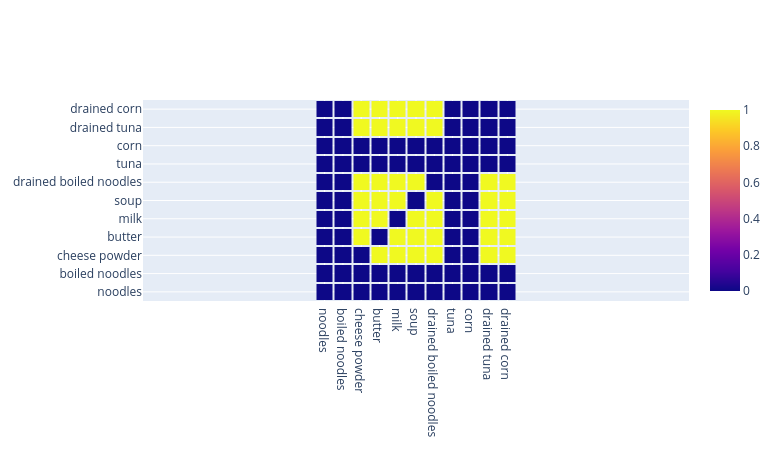

In [33]:
fig = go.Figure(data=go.Heatmap(
                   z=ing_ing,
                   x=ingredients,
                   y=ingredients,
                   xgap = 2,
                   ygap = 2,))

fig.update_layout(
    yaxis = dict(
      scaleanchor = "x",
      scaleratio = 1,
    )
)
fig.show()